Langkah Implementasi SHAP (untuk XGBoost)

c:\Users\Ravicenna\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


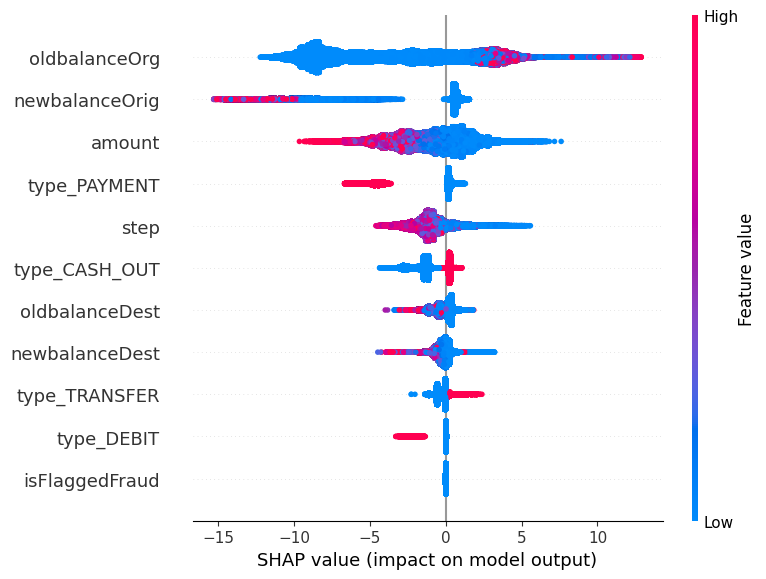

In [1]:
# 1. Import Library
import pandas as pd
import shap
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 2. Load Dataset (harus sama persis dengan preprocessing di imbalance.ipynb)
df = pd.read_csv("fraud_dataset.csv")

# Hapus kolom non-numerik yang tidak digunakan
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encode kolom 'type'
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# Pisahkan fitur dan label
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# 3. Load model XGBoost yang sudah disimpan
model = joblib.load("xgb_model_smote.pkl")

# 4. Inisialisasi SHAP Explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# 5. Plot Summary (Global Interpretasi)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# 6. Plot Force Plot (Local Interpretasi untuk satu transaksi)
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0].values,
    X_test[0],
    feature_names=X.columns
)


Implementasi CONFUSION MATRIX

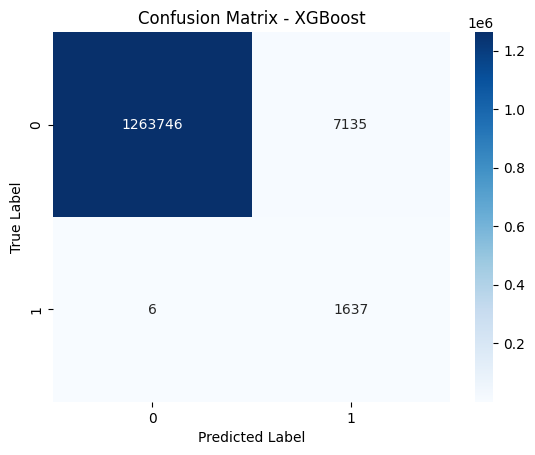

In [2]:
# Import harus di luar fungsi atau baris lain
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi model
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()
